# Motorcycle price prediction 

In [1]:
# import libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
# load datset into dataframe  

In [4]:
bike_data= pd.read_csv('BIKE DETAILS.csv')

In [5]:
bike_data

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [6]:
bike_data.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [7]:
bike_data.tail()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0
1060,Bajaj Pulsar 150,10000,2008,Individual,1st owner,92233,75000.0


In [8]:
# cheking no of col and row 

In [9]:
bike_data.shape

(1061, 7)

In [10]:
# check statistical value 

In [11]:
bike_data.describe()

,selling_price,year,km_driven,ex_showroom_price
count,1061.000000,1061.000000,1061.000000,6.260000e+02
mean,59638.151744,2013.867107,34359.833176,8.795871e+04
std,56304.291973,4.301191,51623.152702,7.749659e+04
min,5000.000000,1988.000000,350.000000,3.049000e+04
25%,28000.000000,2011.000000,13500.000000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,70000.000000,2017.000000,43000.000000,8.703150e+04
max,760000.000000,2020.000000,880000.000000,1.278000e+06


In [12]:
# checking null values 

In [13]:
bike_data.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

# missing value treatment 

In [14]:
bike_data['ex_showroom_price']=bike_data['ex_showroom_price'].fillna(bike_data['ex_showroom_price'].median())

In [15]:
bike_data.isnull().sum()

name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

In [16]:
data=bike_data.drop('ex_showroom_price',axis=1)

In [17]:
data

,name,selling_price,year,seller_type,owner,km_driven
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350
1,Honda Dio,45000,2017,Individual,1st owner,5650
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000
...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000
1057,Honda CB twister,16000,2012,Individual,1st owner,33000
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           1061 non-null   object
 1   selling_price  1061 non-null   int64 
 2   year           1061 non-null   int64 
 3   seller_type    1061 non-null   object
 4   owner          1061 non-null   object
 5   km_driven      1061 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 49.9+ KB


In [19]:
data.shape

(1061, 6)

In [20]:
# data processing 

In [21]:
data.drop('name',axis=1)

,selling_price,year,seller_type,owner,km_driven
0,175000,2019,Individual,1st owner,350
1,45000,2017,Individual,1st owner,5650
2,150000,2018,Individual,1st owner,12000
3,65000,2015,Individual,1st owner,23000
4,20000,2011,Individual,2nd owner,21000
...,...,...,...,...,...
1056,17000,2010,Individual,1st owner,500000
1057,16000,2012,Individual,1st owner,33000
1058,15000,2013,Individual,2nd owner,35000
1059,12000,2009,Individual,1st owner,53000


# univariate analysis 

<AxesSubplot:xlabel='year', ylabel='count'>

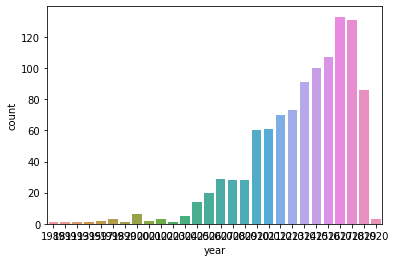

In [22]:
sns.countplot(x='year',data=data)

<AxesSubplot:xlabel='seller_type', ylabel='count'>

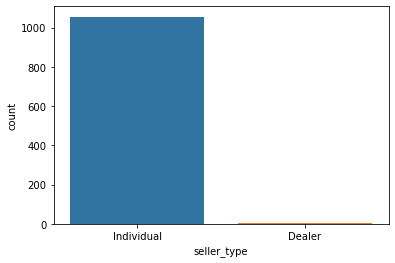

In [23]:
sns.countplot(x='seller_type',data=data)

In [24]:
data['seller_type'].unique()

array(['Individual', 'Dealer'], dtype=object)

# bivariate analysis 

<AxesSubplot:xlabel='year', ylabel='count'>

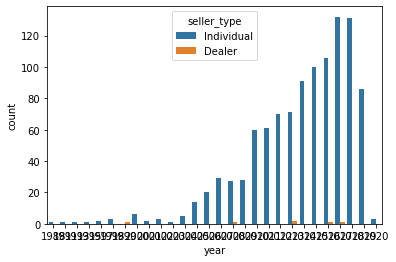

In [25]:
sns.countplot(x='year',hue='seller_type',data=data)

# multivariate analysis 

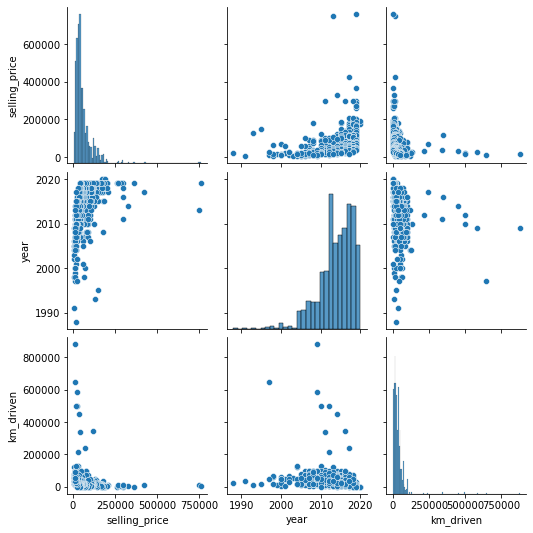

In [26]:
sns.pairplot(data)

# feature encoding 

In [27]:
data.drop('name',axis=1)

,selling_price,year,seller_type,owner,km_driven
0,175000,2019,Individual,1st owner,350
1,45000,2017,Individual,1st owner,5650
2,150000,2018,Individual,1st owner,12000
3,65000,2015,Individual,1st owner,23000
4,20000,2011,Individual,2nd owner,21000
...,...,...,...,...,...
1056,17000,2010,Individual,1st owner,500000
1057,16000,2012,Individual,1st owner,33000
1058,15000,2013,Individual,2nd owner,35000
1059,12000,2009,Individual,1st owner,53000


In [28]:
data['seller_type'].value_counts()

Individual    1055
Dealer           6
Name: seller_type, dtype: int64

In [29]:
data['seller_type']= bike_data['seller_type'].map({'Individual':0,'Dealer':1})

In [30]:
data['owner']=bike_data['owner'].map({'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3})

In [31]:
def process (r):
    if '+' in r:
        result = (float(r.split('+')[0]+ float(r.split)('+')[1]))/2
        return result 
    else:
        return r

# splitting data 

In [32]:
X=data.drop('selling_price',axis=1)

In [33]:
y=data['selling_price']

In [34]:
y

0       175000
1        45000
2       150000
3        65000
4        20000
         ...  
1056     17000
1057     16000
1058     15000
1059     12000
1060     10000
Name: selling_price, Length: 1061, dtype: int64

# model building 

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.20)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression()

In [39]:
X_train.drop('name',axis=1)

,year,seller_type,owner,km_driven
966,2016,0,1,16500
563,2019,0,0,1300
822,2012,0,0,75000
778,2005,0,0,27370
232,2010,0,0,46782
...,...,...,...,...
122,2018,0,0,6100
37,2016,0,0,16000
88,2017,0,0,9432
868,1995,0,2,20000


In [40]:
model.fit(X_train,Y_train)

ValueError: could not convert string to float: 'Hyosung GT250R'